In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
%pip install wordcloud

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Dataset-SA.csv", encoding="unicode_escape")
print(f"Dataset shape : {data.shape}")

Dataset shape : (205052, 6)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
print(f"Feature names : {data.columns.values}")

Feature names : ['product_name' 'product_price' 'Rate' 'Review' 'Summary' 'Sentiment']


In [6]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [7]:
data.dropna(inplace=True)
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (180379, 6)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180379 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   180379 non-null  object
 1   product_price  180379 non-null  object
 2   Rate           180379 non-null  object
 3   Review         180379 non-null  object
 4   Summary        180379 non-null  object
 5   Sentiment      180379 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [9]:
review = data['Review'].unique() # Wrap 'Review' in quotes to reference the column

In [10]:
data['Review'].unique()

array(['super!', 'awesome', 'fair', ..., 'good quality dinner set',
       'good quality product and good option for some one gift.',
       'product looking very nice & strong quality'], dtype=object)

In [11]:
for review in data['Review'] [0:10]:
  print(review)

super!
awesome
fair
useless product
fair
awesome
highly recommended
nice
unsatisfactory
worth the money


In [12]:
data.dtypes

product_name     object
product_price    object
Rate             object
Review           object
Summary          object
Sentiment        object
dtype: object

In [13]:

data.head()


,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Rate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review'].value_counts()
    for x_label, grp in _df_4.groupby('Rate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Rate')
_ = plt.ylabel('Review')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Summary'].value_counts()
    for x_label, grp in _df_5.groupby('Review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review')
_ = plt.ylabel('Summary')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_6.groupby('Summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Summary')
_ = plt.ylabel('Sentiment')

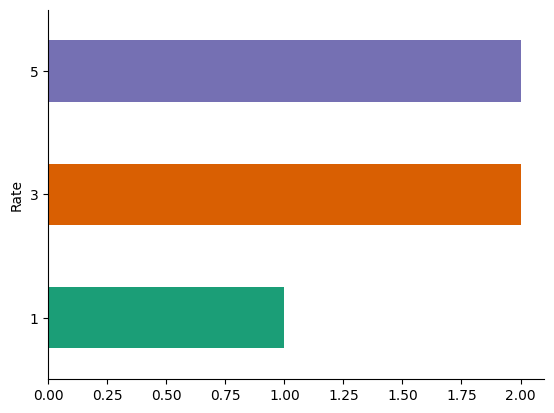

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Rate').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

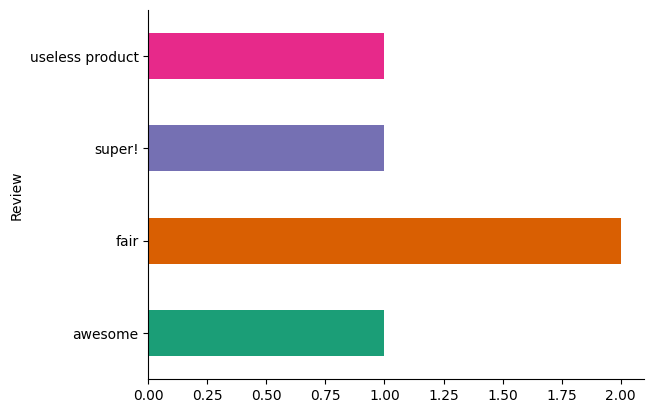

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Review').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

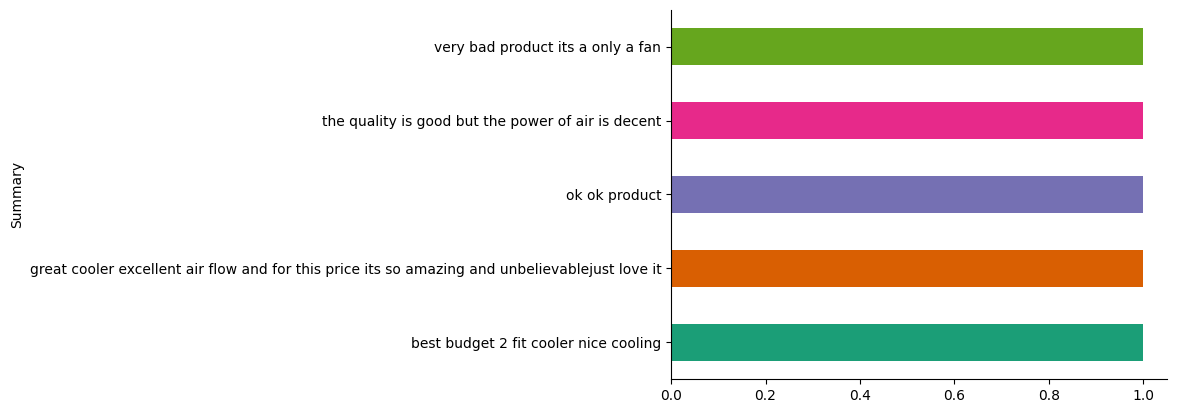

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Summary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

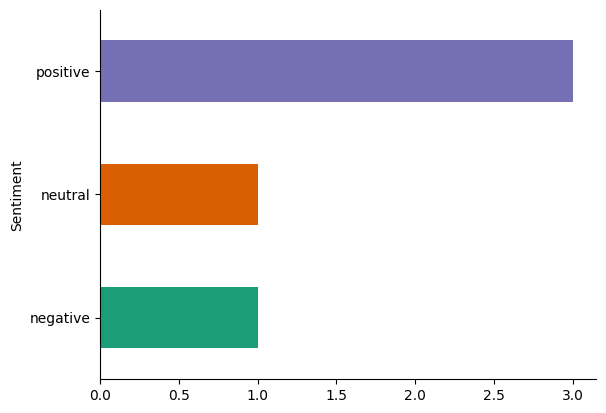

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data = data.drop_duplicates()
print(f"Dataset shape after dropping duplicates : {data.shape}")

Dataset shape after dropping duplicates : (154467, 6)


### Relation between Rate and Review

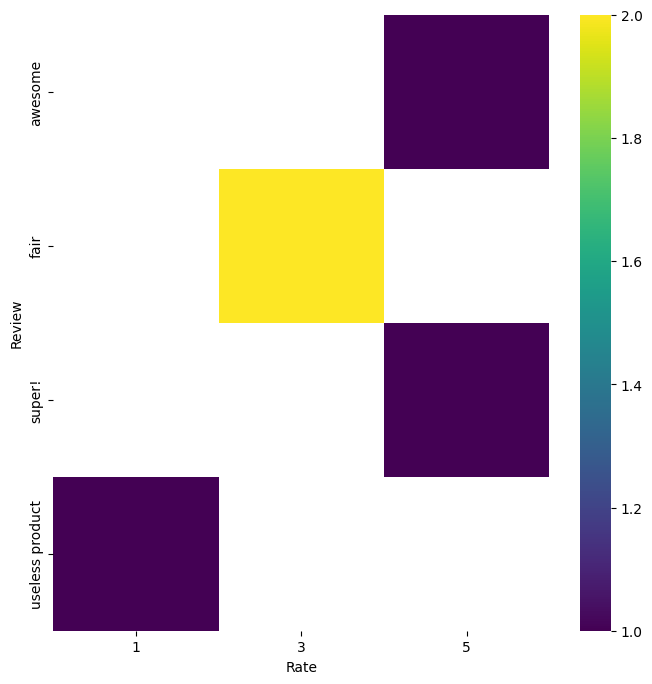

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Review'].value_counts()
    for x_label, grp in _df_4.groupby('Rate')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Rate')
_ = plt.ylabel('Review')

### Reltion between Review and Summary

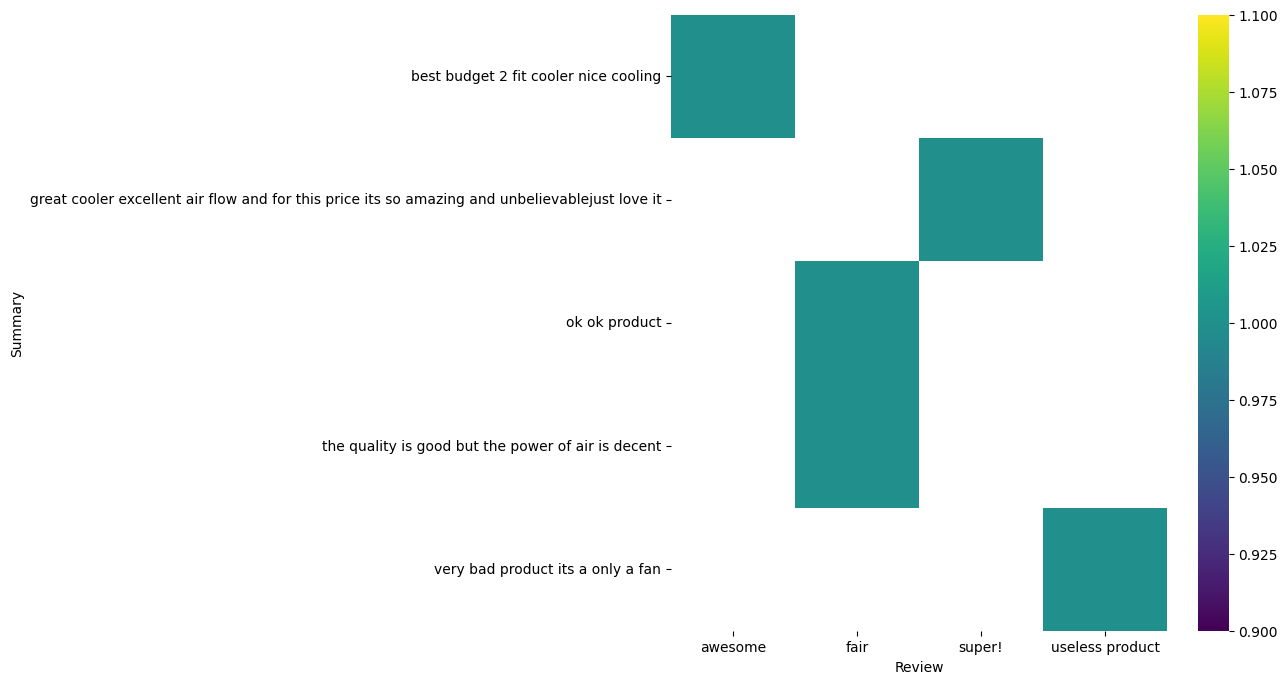

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Summary'].value_counts()
    for x_label, grp in _df_5.groupby('Review')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Review')
_ = plt.ylabel('Summary')

### Relation between Summary and Sentiment

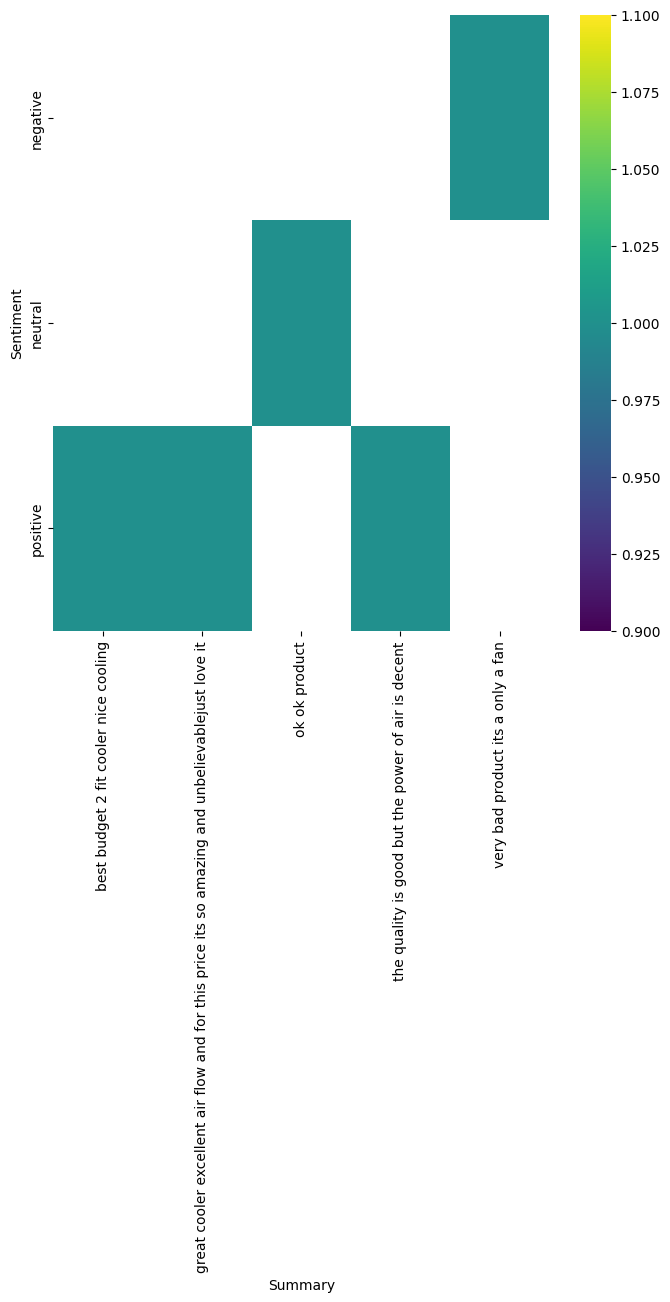

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_6.groupby('Summary')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Summary')
_ = plt.ylabel('Sentiment')

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.Review)

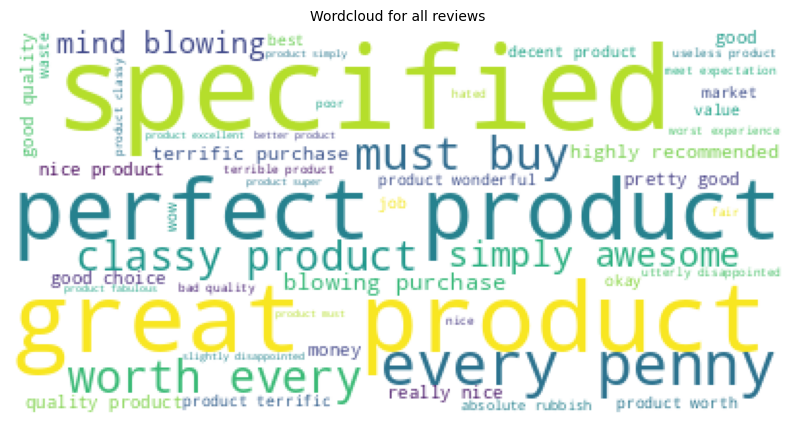

In [ ]:
#Combine all Reviews
reviews = " ".join([review for review in data['Review']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
neg_reviews = " ".join([review for review in data[data['Sentiment'] == 'negative']['Review']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['Sentiment'] == 'positive']['Review']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that Sentiment category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

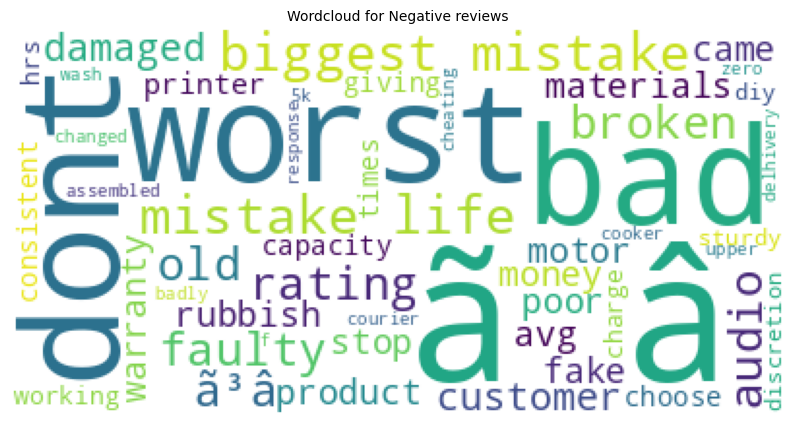

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for Negative reviews', fontsize=10)
plt.axis('off')
plt.show()

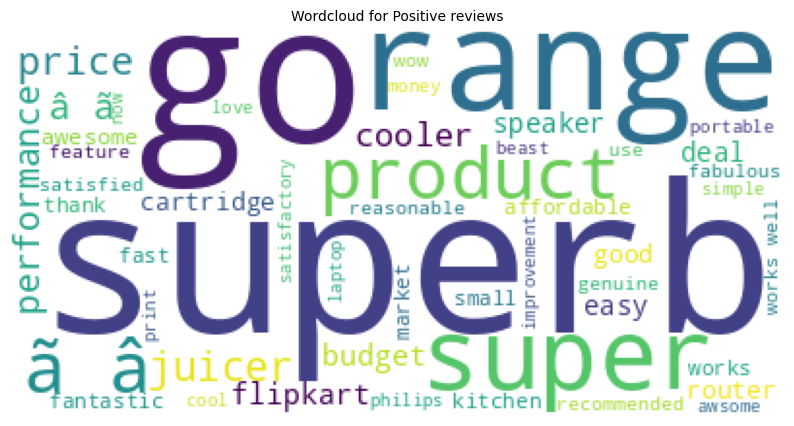

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for Positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
len(data)

154467

In [ ]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Download the stop words corpus
nltk.download('stopwords')

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

# This function was likely overwritten, redefining it here
def review_to_words(raw_review):
    # Handle potential float values by converting them to strings
    if isinstance(raw_review, float):
        raw_review = str(raw_review)

    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  # Apply the review_to_words function to get processed text
  processed_review = review_to_words(data.iloc[i]['Review'])
  # Now apply the regex and stemming to the processed text
  review = re.sub('[^a-zA-Z]', ' ', processed_review)
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-32-ad85ec72ebe8>:21: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
import os
import pickle

# Create the 'Models' directory if it doesn't exist
os.makedirs('Models', exist_ok=True)

# Now you can safely save the CountVectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [ ]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['Sentiment'].values

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (154467, 1019)
y shape: (154467,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (108126, 1019)
y train: (108126,)
X test: (46341, 1019)
y test: (46341,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 3
X test max value: 2


In [ ]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
filename = 'Models/scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9009211475500805
Testing Accuracy : 0.9007142703005977


In [ ]:
y_preds = model_rf.predict(X_test_scl)

In [ ]:
cm = confusion_matrix(y_test, y_preds)

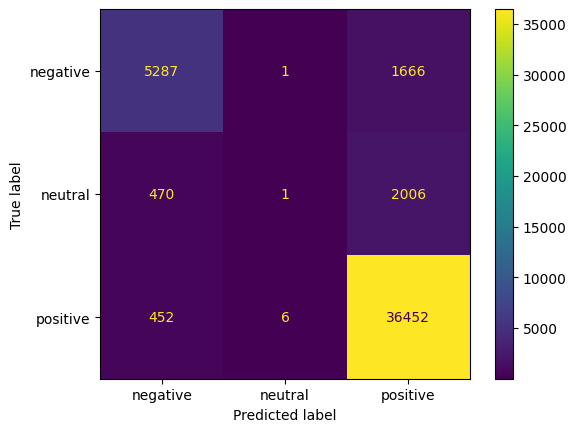

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()


Training Accuracy : 0.9014024099115503
Testing Accuracy : 0.8988800414319933


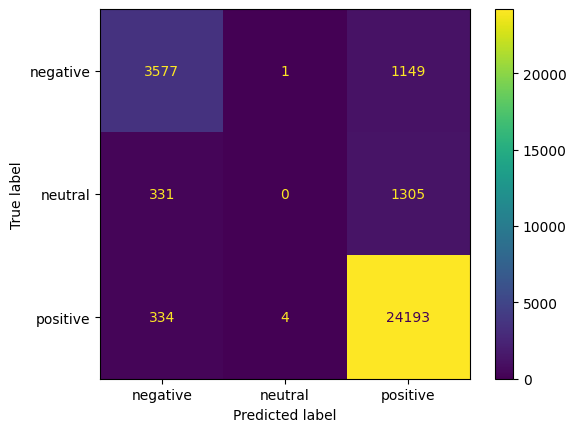

Training Accuracy : 0.9005041554384857
Testing Accuracy : 0.9029585032692432


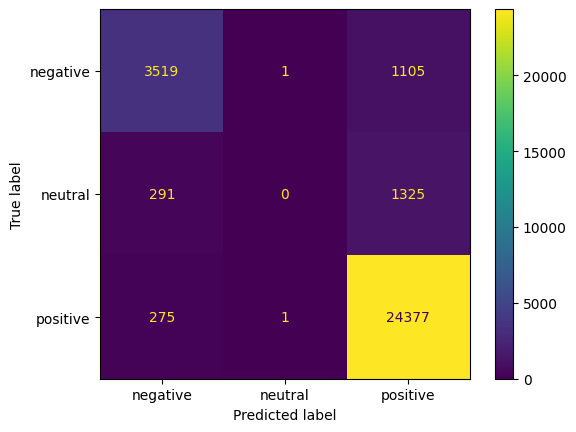

Training Accuracy : 0.9018159159693787
Testing Accuracy : 0.8972906483669439


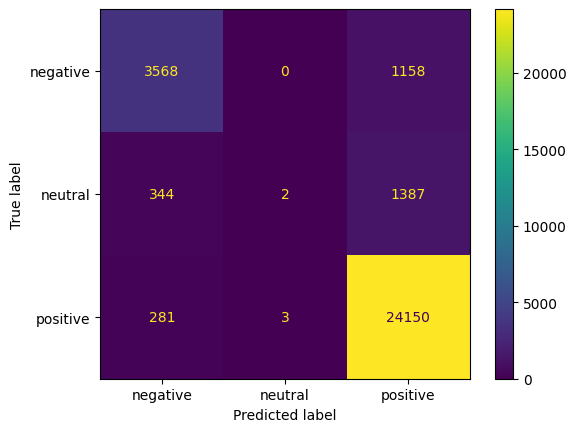

Training Accuracy : 0.9013060999886707
Testing Accuracy : 0.8997831223901854


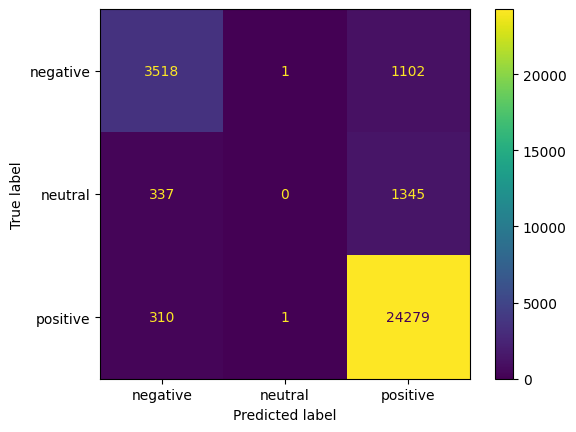

Training Accuracy : 0.9011685305970512
Testing Accuracy : 0.9002039296928107


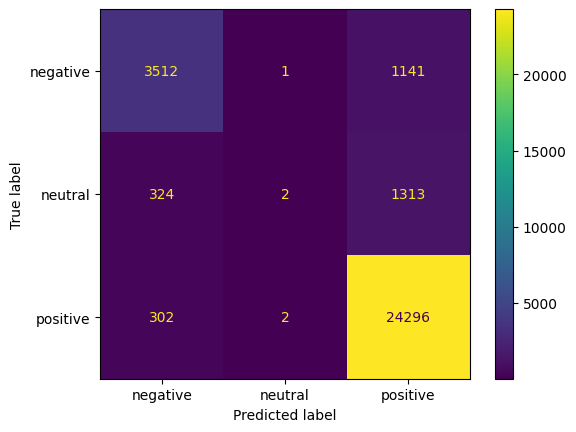

In [ ]:
# K fold cross-validation

from sklearn.model_selection import KFold
# Assuming X is your original feature data that needs to be scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scl = scaler.fit_transform(X) # Scale the data

kfold = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kfold.split(X_scl):
  X_train, X_test = X_scl[train_index], X_scl[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model_rf.fit(X_train, y_train)
  print("Training Accuracy :", model_rf.score(X_train, y_train))
  print("Testing Accuracy :", model_rf.score(X_test, y_test))
  y_preds = model_rf.predict(X_test)
  cm = confusion_matrix(y_test, y_preds)
  cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
  cm_display.plot()
  plt.show()

In [ ]:
filename1 = 'Models/model_rf.pkl'
pickle.dump(model_rf, open(filename1, 'wb'))

In [ ]:
load_model = pickle.load(open(filename1, 'rb'))

In [ ]:
from sklearn.metrics import classification_report
cr = (classification_report(y_test, y_preds))
print(cr)

              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4654
     neutral       0.40      0.00      0.00      1639
    positive       0.91      0.99      0.95     24600

    accuracy                           0.90     30893
   macro avg       0.72      0.58      0.58     30893
weighted avg       0.87      0.90      0.87     30893



In [ ]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 3512     1  1141]
 [  324     2  1313]
 [  302     2 24296]]


In [ ]:
pip install flask

In [18]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [19]:
!git config --global user.name "ahambrahmasmi05"
!git config --global user.email "ashish_2312res186@iitp.ac.in"
